# Regresión Lineal Múltiple: 


## Predicción de Eficiencia de Combustible (MPG)


Este notebook muestra cómo usar la regresión lineal múltiple para predecir la eficiencia de combustible (millas por galón) en automóviles, usando características como caballos de fuerza, peso y aceleración. Utilizamos `scikit-learn`, `pandas` y `seaborn`.


## Paso 1: Importar librerías y cargar los datos

In [1]:
import seaborn as sns
import pandas as pd

# Exploremos los datasets presentes
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [2]:

# Cargar y preparar datos
df = sns.load_dataset('mpg').dropna()
df = df[['horsepower', 'weight', 'acceleration', 'mpg']]
df.head()


,horsepower,weight,acceleration,mpg
0,130.0,3504,12.0,18.0
1,165.0,3693,11.5,15.0
2,150.0,3436,11.0,18.0
3,150.0,3433,12.0,16.0
4,140.0,3449,10.5,17.0


## Paso 2: Definir variables predictoras (X) y variable objetivo (y)

In [3]:

X = df[['horsepower', 'weight', 'acceleration']]  # variables independientes
y = df['mpg']  # variable dependiente (eficiencia)


## Paso 3: Dividir los datos en entrenamiento y prueba

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)


## Paso 4: Crear y entrenar el modelo de regresión lineal

In [5]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Paso 5: Evaluar el modelo

In [6]:

y_pred = model.predict(X_test)

print("R² score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R² score: 0.6913119385044417
MSE: 19.1866036537387


## Paso 6: Interpretar los coeficientes del modelo

In [7]:

coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
})
coef_df


,Variable,Coeficiente
0,horsepower,-0.032768
1,weight,-0.006310
2,acceleration,0.117230


## Paso 7: Visualizar resultados del modelo

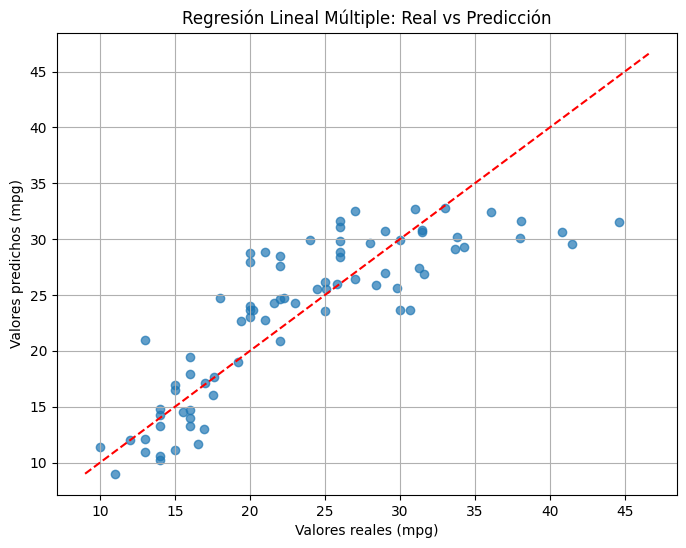

In [8]:

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valores reales (mpg)")
plt.ylabel("Valores predichos (mpg)")
plt.title("Regresión Lineal Múltiple: Real vs Predicción")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.show()


## Predicción con nuevos datos

In [9]:
horsepower = 130       # Caballos de fuerza
weight = 3000          # Peso en libras
acceleration = 15.0    # Aceleración (0-60 mph en segundos)

# Crear el DataFrame con esos valores
nuevos_datos = pd.DataFrame([{
    'horsepower': horsepower,
    'weight': weight,
    'acceleration': acceleration
}])

# Paso 3: Hacer la predicción
prediccion = model.predict(nuevos_datos)

print(f"Predicción de MPG para los datos ingresados: {prediccion[0]:.2f}")


Predicción de MPG para los datos ingresados: 22.39
